# tmscore-analysis

Sampled 100 proteins from CATH and modeled them with various sets of (pairwise) (atom/angular) constraints.
- $C_{\alpha}$
- $C_{\alpha}$, $C_{\beta}$
- $C_{\alpha}$, $\varphi$, $\theta$, $\omega$

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

In [4]:
data = Path("../data")
cst1 = data / "ca_tmscores.tsv"
cst2 = data / "cacb_tmscores.tsv"
cst3 = data / "ca_phi_omega_theta_tmscores.tsv"

cst1_df, cst2_df, cst3_df = map(pd.read_table, (cst1, cst2, cst3))

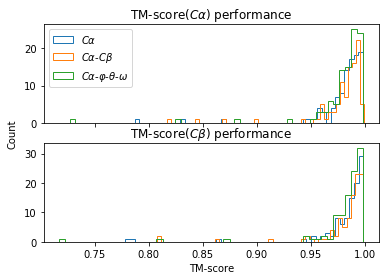

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

Ca    = "$C\\alpha$"
Cb    = "$C\\beta$"
phi   = "$\\varphi$"
theta = "$\\theta$"
omega = "$\\omega$"

csts = [Ca, f"{Ca}-{Cb}", f"{Ca}-{phi}-{theta}-{omega}"]
ax1.set_title(f"TM-score({Ca}) performance")
for cst, df in zip(csts, (cst1_df, cst2_df, cst3_df)):
    ax1.hist(df.CA.values, label=cst, bins=50, histtype='step')
ax1.legend()

fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

ax2.set_xlabel("TM-score")

ax2.set_title(f"TM-score({Cb}) performance")
for cst, df in zip(csts, (cst1_df, cst2_df, cst3_df)):
    ax2.hist(df.CB.values, label=cst, bins=50, histtype='step')
#ax1.set_xticks([])

plt.savefig("figs/TMScores__CATHrand100__varying_constraints.png")
plt.show()